<a href="https://colab.research.google.com/github/appolinaru/Music_Data_Mining/blob/main/%D0%9B%D0%A02_Music_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вычислительное музыковедение: Модели и методы Music Data Mining

## Лабораторная работа №2. Акустические признаки и Monophonic Pitch Detection

Подготовьте аудиозапись, с которой будете работать: длительность до 30 секунд, монофоник. Можете воспользоваться сервисом с прошлой ЛР, сделайте midi и экспортируйте wav. Еще можно поиграться с https://vocalremover.org/

In [ ]:
import librosa
import scipy.signal as signal_lib
from IPython.display import Audio

filename = "/content/PrecrasnoyeDalyoko_1681936176497(1).wav" # ВАШ файл

signal, sr = librosa.load(filename, sr=None)
Audio(signal, rate=sr)

### Акустические признаки [2 балла]

Задание [2 балла]. Найдите в документации библиотеки [librosa](https://librosa.org/doc/latest/index.html) как получить акустические признаки, которые мы прошли на лекции:

1. Спектрограммы
2. Мел-спектрограммы
3. MFCC

Получите их и визуализируйте

### Алгоритмы Monophonic Pitch Detection

#### Определение амплитуды [1 балл]

**Энергия и средняя мощность сигналов** ([Источник](https://ru.dsplib.org/content/fourier_transform_energy/fourier_transform_energy.html))  

Пусть дан некоторый сигнал $ s(t) $, который характеризует изменение напряжения или силы тока во времени. Тогда $p(t) = s^2(t)$ будет определять мгновенную мощность.   

Проинтегрируем мгновенную мощность $p(t)$ на некотором интервале времени $\left[t_0, \, t_1\right]$ и получим энергию сигнала на данном интервале:

$$ E = \int_{t_0}^{t_1} p(t)\mathrm{d}t = \int_{t_0}^{t_1} s^2(t)\mathrm{d}t  $$  

Тогда средняя мощность $P_{\textrm{mean}}$ сигнала $s(t)$ на данном интервале времени равна:

$$ P_{\textrm{mean}} = \cfrac{E}{t_1 - t_0} $$

$\sqrt{P_{\textrm{mean}}}$  значение является мерой "среднего" уровня амплитуды сигнала по времени. В электротехнике и акустике RMS значение используется для оценки мощности или амплитуды сигналов.



In [ ]:
def get_rms_value(frame):
  # ВАШ КОД тут
  return ...

#### Pitch detection [6 баллов]

**Алгоритм 1. На основе ZRC.**

 [The zero-crossing rate (ZCR)](https://en.wikipedia.org/wiki/Zero-crossing_rate#cite_note-2) это скорость, с которой сигнал изменяется от положительного к нулевому, затем к отрицательному или от отрицательного к нулевому, затем к положительному. Его значение широко используется как в распознавании речи, так и в MIR, являясь ключевым признаком для классификации ударных звуков.


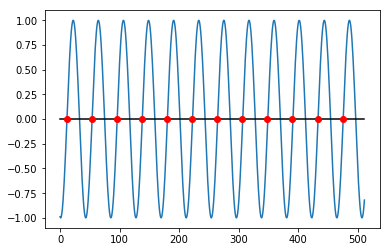

Алгоритм:  
1. ZCR
2. Найти разницу в индексах
3. Найти среднюю разницу
4. Рассчитать высоту в частотах: $\cfrac{f_s}{mean(diffs)}$

In [ ]:
def extract_pitch_zcrs(frame, srate):
    indices = np.nonzero((frame[1:] >= 0) & (frame[:-1] < 0))[0]
    pitch = (srate / np.mean(np.diff(indices)))
    return pitch

**Алгоритм 2. На основе FFT.** [2 балла]

1. Посчитать $|FFT(signal)|$
2. Найти максимальную частоту (отсчет) $freq$
3. Перейти от отсчета к самой частоте в Гц: $freq*{f_s}/N$, N - длина $signal$

In [ ]:
def extract_pitch_fft(frame, srate):
  # ВАШ КОД
  return pitch

**Алгоритм 3. На основе автокорреляции.** [2 балла]  
1. Посчитать автокорреляцию (используйте numpy -> correlate(..., mode='full'))
2. Берем вторую половину результата (вспоминаем лекцию)
3. Находим lag при котором значение автокор наибольшее (то есть второй пик)
4. Как в Алгоритме 1 на ZCR, находим частоту: srate / max_lag

In [ ]:
def extract_pitch_acr(frame, srate):
  # ВАШ КОД
  return pitch

**Алгоритм 4. AMDF: Average Magnitude Difference Function.** [2 балла]   

AMDF - также сдвигает сигнал, но вместо умножения использует вычитание для определения периодичности как нулевой. Отсутствие умножений делает ее эффективной для микросхем DSP и обработки в реальном времени.

$$ AMDF(m) = \sum_{n=0}^{N-1} |x[n] - x[n+m]|^k $$

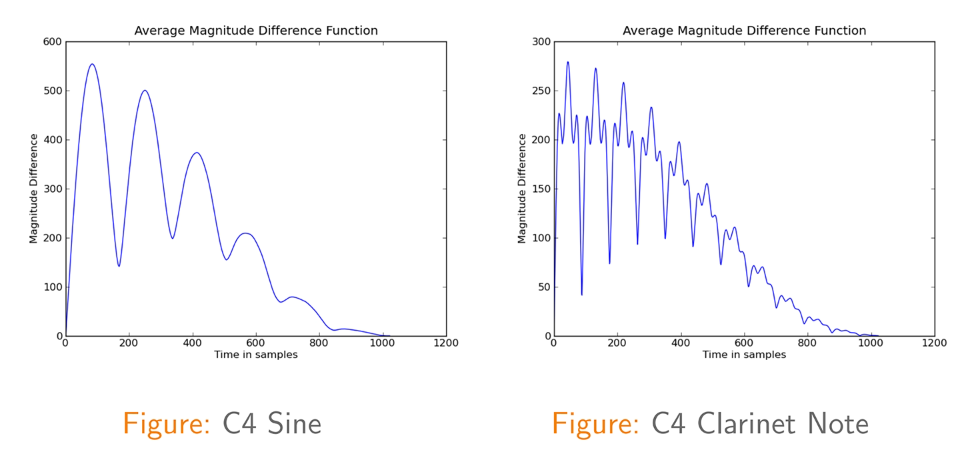

In [ ]:
def extract_pitch_amdf(frame, srate):
  # ВАШ КОД
  return pitch

#### Собираем все вместе [1 балла]

In [ ]:
import numpy as np
import tqdm

def pitch_track(signal,  # сигнал
                srate,   # частота дискр
                hopSize, # сдвиг окна
                winSize, # размер окна
                extractor=extract_pitch_zcrs # экстрактор высоты
                ):
    offsets = np.arange(0, len(signal), hopSize)
    pitch_track = np.zeros(len(offsets))
    amp_track = np.zeros(len(offsets))

    for (m,o) in tqdm.tqdm(enumerate(offsets)):
        frame = signal[o:o+winSize]
        pitch_track[m] = extractor(frame, srate)
        amp_track[m] = get_rms_value(frame)

        if (pitch_track[m] > 1500):
            pitch_track[m] = 0

    return (amp_track, pitch_track)

Реализуйте медианный фильтр [1 балла]

[Медиа́нный фи́льтр](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D0%BD%D1%8B%D0%B9_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80) — один из видов цифровых фильтров, широко используемый в цифровой обработке сигналов и изображений для уменьшения уровня шума. Медианный фильтр является нелинейным КИХ-фильтром.

Значения отсчётов внутри окна фильтра сортируются в порядке возрастания (убывания); и значение, находящееся в середине упорядоченного списка, поступает на выход фильтра. В случае чётного числа отсчётов в окне выходное значение фильтра равно среднему значению двух отсчётов в середине упорядоченного списка. Окно перемещается вдоль фильтруемого сигнала, и вычисления повторяются.

Медианная фильтрация — эффективная процедура обработки сигналов, подверженных воздействию импульсных помех.

Ниже рассматривается пример применения медианного фильтра для одномерного сигнала с окном размером в три отсчёта ко входному массиву x (искусственно введённые продублированные значения показаны полужирно):

x = [2 80 6 3]

    y[1] = медиана[2 2 80] = 2
    y[2] = медиана[2 80 6] = медиана[2 6 80] = 6
    y[3] = медиана[80 6 3] = медиана[3 6 80] = 6
    y[4] = медиана[6 3 3] = медиана[3 3 6] = 3

и в итоге:

y = [2 6 6 3] — выход медианного фильтра

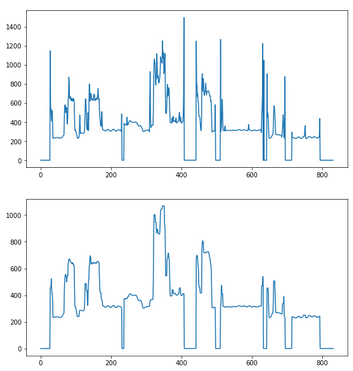

In [ ]:
def med_filtr(track, kernel_size=15): # kernel_size - гиперпараметр-окружение
  # ВАШ КОД
  return track

In [ ]:
from scipy.interpolate import interp1d

def sonify(amp_track, pitch_track, srate, hop_size):

    times = np.arange(0.0, float(hop_size * len(pitch_track)) / srate,
                      float(hop_size) / srate)
    sample_times = np.linspace(0, np.max(times), int(np.max(times)*srate-1))
    freq_interpolator = interp1d(times, pitch_track)
    amp_interpolator = interp1d(times, amp_track)
    sample_freqs = freq_interpolator(sample_times)
    sample_amps  = amp_interpolator(sample_times)
    audio = np.zeros(len(sample_times));
    T = 1.0 / srate
    phase = 0.0

    # обновление фаз в соответствии с частотами выборки
    for i in range(1, len(audio)):
        audio[i] = sample_amps[i] * np.sin(phase)
        phase = phase + (2*np.pi*T*sample_freqs[i])

    return audio

In [ ]:
hop_size = 2048
win_size = hop_size*4
kernel_size=21

amp, pitches_before = pitch_track(signal, sr, hop_size, win_size, extract_pitch_zcrs)

amp = med_filtr(amp, kernel_size=kernel_size) # med_filtr
pitches_after = med_filtr(pitches_before, kernel_size=kernel_size) # med_filtr

audio = sonify(amp, pitches_after, sr, hop_size)
Audio(audio, rate=sr)

258it [00:00, 11549.99it/s]


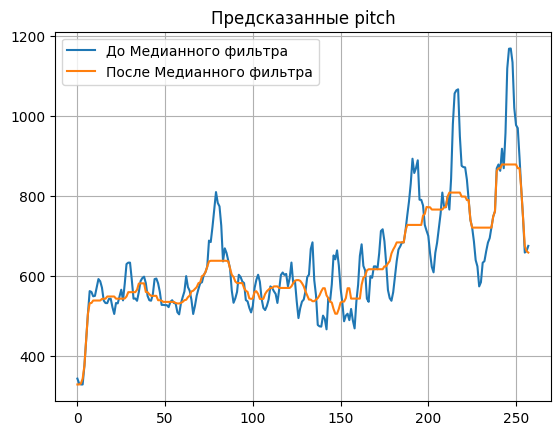

In [ ]:
import matplotlib.pyplot as plt

plt.plot(pitches_before, label='До Медианного фильтра')
plt.plot(pitches_after, label='После Медианного фильтра')
plt.grid(); plt.legend()
plt.title('Предсказанные pitch')
plt.show()

Задание:
1. Используйте каждый экстрактор
2. Субъективно оцените
3. Напишите выводы